# **Gradient Decent**

This is my loss function:
$$\mathcal J_{\vec w}=w_1^2 + w_2^2 + 40 \cos(w_1) \cos(w_2) + w_1 \sin(w_2)$$

In [41]:
import numpy as np

def loss(w):
    w1 = w[0]
    w2 = w[1]
    j = w1**2 + w2**2 + 40*np.cos(w1)*np.cos(w2)+w1*np.sin(w2)
    return j

Gradient function returns the partial derivitave of the loss function 

In [42]:
# Partial derivatives by sympy library
from sympy import *

def gradient(w):
    x, y = symbols("x y")
    f = x**2 + y**2 + 40*cos(x)*cos(y) + x*sin(y)
    w1_gradient = diff(f, x)
    w1_gradient = w1_gradient.subs(Symbol("x"), w[0]).subs(Symbol("y"), w[1])
    w2_gradient = diff(f, y)
    w2_gradient = w2_gradient.subs(Symbol("x"), w[0]).subs(Symbol("y"), w[1])
    return np.array([w1_gradient, w2_gradient])

Implementing the gradeint decent funtion which returns the optimized weight vector 

In [43]:
def gradient_descent(w, eta=0.01):

  # copy the weights to not modify the original values
  w_star = w.copy()
  gradient_magnitude = 1
  count = 0
   # perform iterative gradient descent
  while gradient_magnitude > 0.000001:
    
    # compute the gradient
    w_gradient = gradient(w_star).astype(float)

    # update the weights
    w_star = w_star - eta*w_gradient

    #additional termination criteria?
    gradient_magnitude = np.linalg.norm(w_gradient)
    count += 1
    if count >= 1000000:
      break

    return w_star

In [44]:
import random
from tqdm import tqdm
stored_weights = []

for i in tqdm(range(1000)):
    # create random weight vector
    w = [random.uniform(-5, 5), random.uniform(-5, 5)]
    # call gradient descent
    w_star = gradient_descent(w)
    # store it in the list
    stored_weights.append(w_star)

100%|██████████| 1000/1000 [00:06<00:00, 144.63it/s]


In [45]:
maximum_number_of_minima = 12

# compute the number of reached minima 
minima = []
for w_new in stored_weights:
  # check if this weight vector is far enough 
  # from all previously stored vectors
    if all(np.linalg.norm(w_star-w) > 1e-3 for w in minima):
        minima.append(w_star)
number_of_minima = len(minima)

assert number_of_minima <= maximum_number_of_minima

print("Check passed. The number of minima", number_of_minima, "is lower than or equal to the maximum", maximum_number_of_minima)

Check passed. The number of minima 1 is lower than or equal to the maximum 12


In [46]:
# find the lowest loss
losses = [loss(w) for w in stored_weights]
min_loss_index = np.argmin(losses)
minimum_loss = losses[min_loss_index]
minimum_weights = stored_weights[min_loss_index]

print("The minimum loss value of:", minimum_loss, "was found for minimum", minimum_weights)

The minimum loss value of: -30.579852151080388 was found for minimum [-0.02159459 -2.97175428]


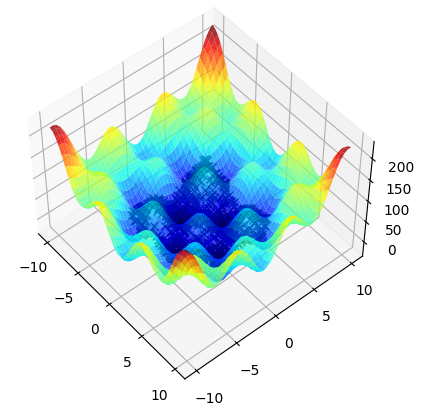

In [47]:
from matplotlib import pyplot

# create 3D axis
figure = pyplot.figure()
axis = figure.add_subplot(111, projection='3d', azim = -40, elev=50)

# define range to plot
w_range = np.linspace(-10,10)
w1, w2 = np.meshgrid(w_range, w_range)

# compute loss for w1 and w2
J = loss([w1,w2])

# plot surface with jet colormap
axis.plot_surface(w1, w2, J, cmap="jet", alpha=0.8)

# plot resulting points in 3D
for w_star in stored_weights:
  # compute the z-position
  z = loss(w_star)
  # plot as 3D point
  axis.plot([w_star[0]], [w_star[1]], [z], "kx")